In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
%matplotlib inline


In [3]:
import time
import numpy as np
import tensorflow as tf



In [4]:
print (tf.__version__)

2.4.0


In [5]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

In [6]:
from src.data import get_image_value
from src.data import get_file_list
from src.data import extract_roi
from src.utils import show_result_img

In [7]:
detector_model_path = f"./data/images/box/models/detection_model-ex-003--loss-0013.547.h5"
json_path = f"./data/images/box/json/detection_config.json"
cls_model_path = f"./data/models/mobilnet/mobilenet.h5"

In [8]:
sample_file_list = [f'./data/images/samples/s{i}.jpg' for i in range(0,19)]

In [9]:

def model_load(detection_model_path,
               json_path,
               cls_model_path,):
    
    detector = CustomObjectDetection()
    detector.setModelTypeAsYOLOv3()
    
    detector.setModelPath(detector_model_path) 
    detector.setJsonPath(json_path)
    detector.loadModel()
    
    model = tf.keras.models.load_model(cls_model_path)
    
    return detector, model


def detect_misprinted_label(img,
                            detector, 
                            model,
                            output_image_path='tmp.jpg'):
    
    start_tm = time.time()
    _, detections = detector.detectObjectsFromImage(input_image=img,
                                                   input_type='array',
                                                   output_type='array')
                                                 
    
    print ("Detection time : {:.2f}s".format(time.time() - start_tm))
    
    results = []
    if len(detections)>0:
        roi_list = extract_roi(plt.imread(sample_file_list[idx]), detections)
        
        pred = model.predict(np.array(roi_list))
        
        results = show_result_img(img, pred, detections)
    

In [10]:
detector, model = model_load(detector_model_path,
                             json_path,
                             cls_model_path)

In [11]:
idx = 1

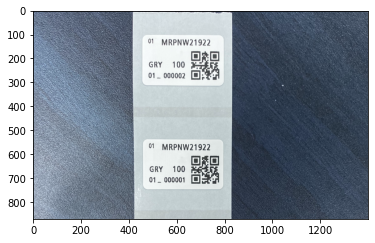

In [12]:
plt.imshow(cv2.imread(sample_file_list[idx]))

Detection time : 0.66s


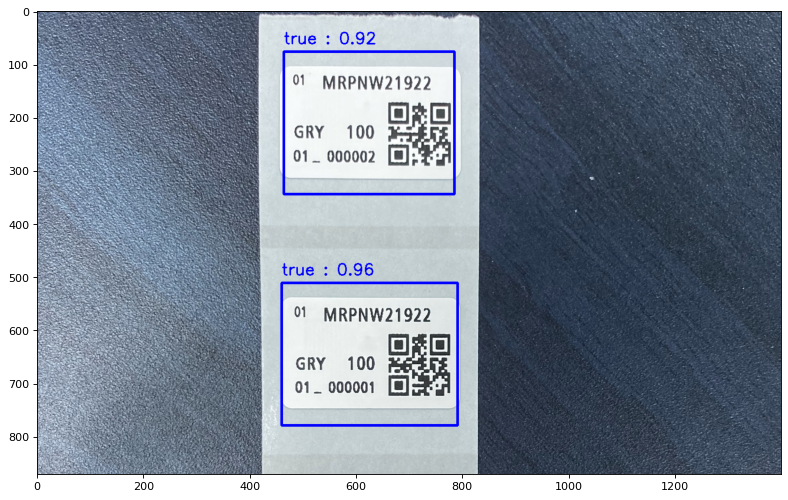

In [13]:
detect_misprinted_label(cv2.imread(sample_file_list[idx]), detector, model)